<a name="top"></a>
## Contents

* [Setup](#Setup)
* [References](#References)
* [ELLI](#ELLI)
* [ELLI](#ELLI)
* [GELLI2](#GELLI2)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions in the ELLI and GELLI families, as described in Table 5, p. 15 [1] and Section 4.1, p. 490 [2].

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials with a maximum of 50.000 function evaluations.

In [1]:
import dataclasses

import math
import numpy as np

from anguilla.fitness.base import ObjectiveFunction
from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, pareto_front_plot_2d, runtime_summary, volume_summary

In [16]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 10

# Number of parents
N_PARENTS = 20

INITIAL_STEP_SIZE = 1.0

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 75847534

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 50000

# 2) Other global values

# Store common parameters which are customized using dataclasses.replace
def get_base_params(fn_cls: ObjectiveFunction):
    return TrialParameters(
                fn_cls,
                fn_args=(N_DIMENSIONS,),
                n_parents=N_PARENTS,
                initial_step_size=INITIAL_STEP_SIZE,
                max_evaluations=MAX_EVALUATIONS,
            )

def run(fn_cls: ObjectiveFunction, **parameter_replacements: dict):
    params = dataclasses.replace(get_base_params(fn_cls), **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)

## ELLI1
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 1.33s, ask = 0.28s, tell = 0.46s, eval = 0.60s
No reference point was provided.


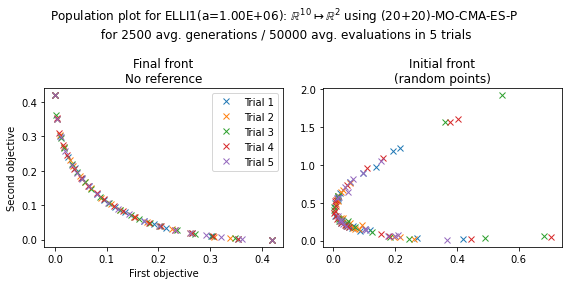

In [17]:
fig = run(benchmark.ELLI1, success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 1.44s, ask = 0.30s, tell = 0.49s, eval = 0.65s
No reference point was provided.


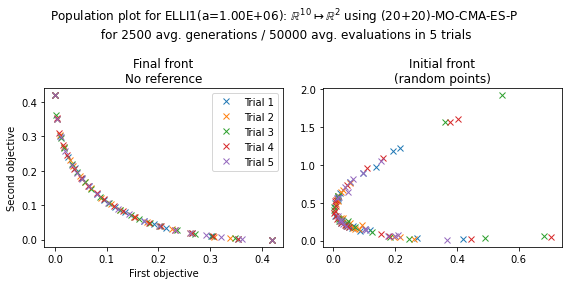

In [18]:
fig = run(benchmark.ELLI1)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.ELLI1, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.ELLI1, n_offspring=1)

## ELLI2
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 1.33s, ask = 0.29s, tell = 0.42s, eval = 0.63s
No reference point was provided.


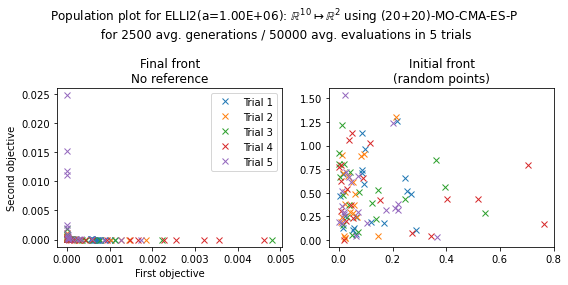

In [19]:
fig = run(benchmark.ELLI2, success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 1.50s, ask = 0.32s, tell = 0.47s, eval = 0.71s
No reference point was provided.


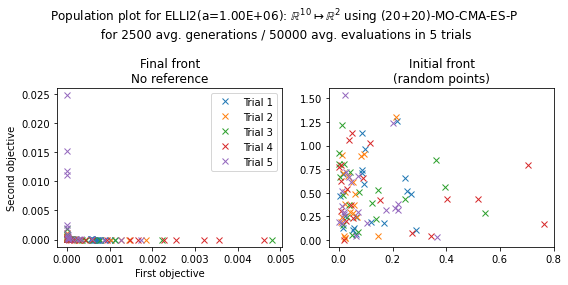

In [20]:
fig = run(benchmark.ELLI2)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.ELLI2, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.ELLI2, n_offspring=1)

## GELLI2
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.18s, ask = 0.30s, tell = 0.36s, eval = 1.52s
No reference point was provided.


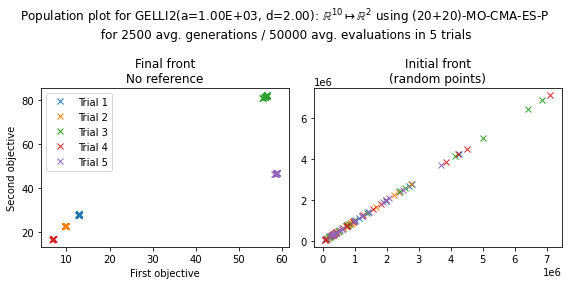

In [21]:
fig = run(benchmark.GELLI, success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 2.28s, ask = 0.32s, tell = 0.37s, eval = 1.59s
No reference point was provided.


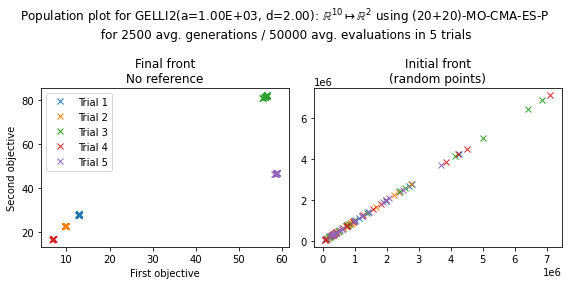

In [22]:
fig = run(benchmark.GELLI)

### Steady-state, individual-based

In [ ]:
fig = run(benchmark.GELLI, success_notion="individual", n_offspring=1)

### Steady-state, population-based

In [ ]:
fig = run(benchmark.GELLI, n_offspring=1)

## References
[Back to top](#top)

[1] C. Igel, N. Hansen, and S. Roth. Covariance matrix adaptation for multi-objective optimization. Evolutionary Computation, 15(1):1–28, 2007. doi:10.1162/evco.2007.15.1.1.

[2] T. Voß, N. Hansen, and C. Igel. Improved Step Size Adaptation for the MO-CMA-ES. In Genetic And Evolutionary Computation Conference, 487–494. Portland, United States, July 2010. ACM. URL: https://hal.archives-ouvertes.fr/hal-00503251, doi:10.1145/1830483.1830573.